<a href="https://colab.research.google.com/github/Arshad9999/10-Image-Classification-using-CNN/blob/main/SampleCode/cnn_basic_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import TensorFlow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 2s 0us/step


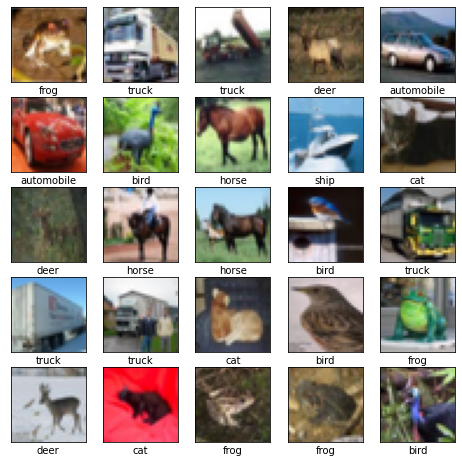

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    #which is why we need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
len(train_images[0])

32

In [ ]:
train_images[0].shape

(32, 32, 3)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
# Adam is the best among the adaptive optimizers in most of the cases
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# An epoch means training the neural network with all the
# training data for one cycle. Here I use 10 epochs
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 84s 53ms/step - loss: 1.5255 - accuracy: 0.4434 - val_loss: 1.2460 - val_accuracy: 0.5530
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1551 - accuracy: 0.5893 - val_loss: 1.0840 - val_accuracy: 0.6177
Epoch 3/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.9949 - accuracy: 0.6475 - val_loss: 0.9689 - val_accuracy: 0.6616
Epoch 4/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.8935 - accuracy: 0.6843 - val_loss: 0.9014 - val_accuracy: 0.6892
Epoch 5/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8137 - accuracy: 0.7139 - val_loss: 0.9044 - val_accuracy: 0.6871
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7554 - accuracy: 0.7352 - val_loss: 0.8814 - val_accuracy: 0.6941
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7029 - accuracy: 0.7537 - val_loss: 0.8297 - val_accura

313/313 - 4s - loss: 0.8548 - accuracy: 0.7168 - 4s/epoch - 11ms/step


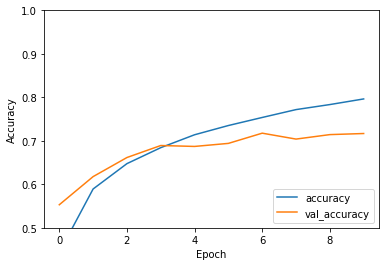

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

In [ ]:
print('Test Accuracy is',test_acc)

Test Accuracy is 0.7167999744415283


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
class_names[train_labels[0][0]]

'frog'

In [ ]:
class_names[model.predict(np.asarray([train_images[0]])).argmax()]

'frog'

In [ ]:
class_names[train_labels[50][0]]

'truck'

In [ ]:
class_names[model.predict(np.asarray([train_images[50]])).argmax()]

'truck'